# Project: Investigate a Dataset (Patients and No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

__Selected Dataset:__ no-show appointments

__Dataset Description:__ This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


#### _The dataset consists of 14 variables and I will describe what each variable indicates separately._

**PatientId:** Identification of a patient.
<br>

**AppointmentID:** Identification of a appointment.
<br>

**Gender:** Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
<br>

**ScheduledDay:** Time when patients set up their appointments.
<br>

**AppointmentDay:** Time when patients call to book their appointments.
<br>

**Age:** The age of each patient.
<br>

**Neighbourhood:** Where the appointment takes place.
<br>

**Scholarship:**  indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família".
<br>

**Hipertension:**  indicates whether or not the patient has abnormally high blood pressure.
<br>

**Diabetes:**  indicates whether or not the patient has Diabetes.
<br>

**Alcoholism:**  indicates whether or not the patient has Alcoholism.
<br>

**Handcap:**  indicates whether or not the patient is with special needs.
<br>

**SMS_received:**  indicates if patient received an SMS about the appointment or not
<br>

**No-show:**   ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

<br>

**Analysis Question:** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# import statements for all of the packages and magic commands
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [2]:
# load data in pandas and discover it
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
# explore the shape of the data (rows and columns)
df.shape

(110527, 14)

We have 110527 appointments (rows) and 14 features (columns)

In [4]:
# explore if the data has a duplicated rows
df.duplicated().sum()

0

no duplicated rows in all data

In [5]:
# explore unique values in PatientId column
df["PatientId"].nunique()

62299

we explore the "PatientId" column and it has 62299 unique values

In [6]:
# explore duplicated values or non unique values in PatientId column
df["PatientId"].duplicated().sum()

48228

We find that "PatientId" column has 48228 duplicated values.
<br>
It means that percentile unique values is 56% of all rows and there is many duplicated values we want to deal with it.

In [7]:
# check the number of duplicated values in "PatientId" and "No-show" columns
# we want to see if the duplicated patient has different status or not
df[["PatientId","No-show"]].duplicated().sum()

38710

We find that there is 38710 of patientId have the same status, so we will remove them in <a href="#cleaning">Data Cleaning</a>

In [8]:
# explore the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


all columns have the same number 110527 of values and it means there is no missing values (NaN) in data

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### __Summary Statistics__:
<ul>
<li>The mean age is 37, the highest age is 115, and the lowest age is -1, and this is often considered a mistake, so I will remove it, but it will not affect the analysis process</li>
<li>about 50% of ages is between 18 and 55</li> 
<li>about 50% of patients not experienced with any chronic disease</li>
<li>25% of patients did not receive SMS</li>
<li>majority are not handicapped</li>
</ul>



In [10]:
# find how many rows that have age = -1 
mistake = df[df["Age"] == -1]
mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


## Data Wrangling Summary
<ul>
<li>We loaded the data from csv file and explore the first few rows</li>
<li>Take a look on the shape of data then show the duplicated values and remove it</li>
<li>Take a look on number of unique values in primary key of data</li>
<li>Get some information about data like data types and null values</li>
<li>Draw conclusions from summary statistics</li>
</ul>

<a id='cleaning'></a>
## Data Cleaning

Here I will do some data cleaning process to handle the data and prepare it for analysis



In [11]:
# remove row 99832
df.drop(index=99832,inplace=True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum value in "Age" become 0 instead of -1

In [13]:
# correction on column names 
df.rename(columns={"Hipertension":"Hypertension"},inplace=True)
df.rename(columns={"No-show":"No_show"},inplace=True)
df.rename(columns={"Handcap":"Handicap"},inplace=True)
df.head(3)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [14]:
# removing duplicated values in "PatientId" and "No_show" from the data 
df.drop_duplicates(["PatientId","No_show"],inplace=True)
df.shape

(71816, 14)

The data become 71816 rows because we removed the 38710 duplicated values in patientId and No_show

In [15]:
# removing the data that I will not use in data analysis process
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],inplace=True,axis=1)

In [16]:
df.head(3)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No


## Data Cleaning Summary
<ul>
<li>We removed the row that contains -1 in "Age" column</li>
<li>Remove the duplicated values in "PatientId" and "No_show" and data become 71816 rows</li>
<li>Remove unnecessary columns to do a clean EDA process</li>
</ul>

<a id='eda'></a>
## Exploratory Data Analysis

We're ready to move on to exploration. __Compute statistics__ and __create visualizations__ with the goal of addressing the research questions that we posed in the Introduction section. 

### Overview

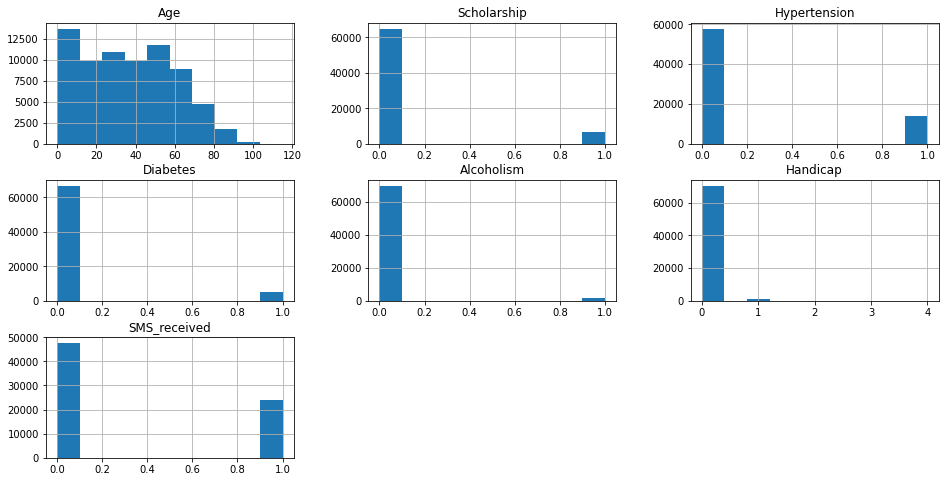

In [17]:
# creating histograms for each column in dataset
df.hist(figsize=(16,8));

### Overview Conclusions
<ul>
<li>Most of Ages is between 0 and 10 and between 40 and 60 years old</li>
<li>more than 50% of patients did not recieved SMS</li>
<li>24% of Patients experienced with hypertension</li>
<li>Most of Patients did not esperienced with chronic diseases</li>
<li>Patients with hypertension are greater than those with diabetes</li>
<li>Most of patients did not enroll in Brazilian program</li>
</ul>

In [18]:
# I will split the Patients into 2 groups according to show or no show appointments
# if "No" it means that patient show up 
# if "Yes" it means that patient did not show
show = df["No_show"] == "No"
no_show = df["No_show"] == "Yes"

# count number of show appountments
df[show].count()

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handicap         54153
SMS_received     54153
No_show          54153
dtype: int64

There is 54153 patients showed up to their appointmets

In [19]:
# count number of no show appointments
df[no_show].count()

Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handicap         17663
SMS_received     17663
No_show          17663
dtype: int64

And 17663 of patients did not showed up to their appoitnments
<br>
<ul><li>It means that 25% of Patients did not showed up and this may be due to many factors

In [20]:
# get mean value of show appointments
print(df[df["No_show"] == "No"].mean())

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handicap         0.020904
SMS_received     0.297232
dtype: float64


C:\Users\Eltaher\AppData\Local\Temp\ipykernel_1828\1332681327.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df[df["No_show"] == "No"].mean())


<ul>
<li>mean age in show appointments is 37</li>
<li>mean SMS_received is 0.3 it means that a little bit of patients got SMS message and show up to their appointments</li>
</ul>

In [21]:
# get mean value of no show appointments
df[no_show].mean()

C:\Users\Eltaher\AppData\Local\Temp\ipykernel_1828\491401787.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[no_show].mean()


Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handicap         0.017777
SMS_received     0.453094
dtype: float64

<ul>
<li>mean age in show appointments is 34</li>
<li>mean SMS_received is 0.6 it means that there is alot of people got SMS message and did not showed up,<br> so company need to check their marketing campaigns</li>
</ul>

### Exploring the influence of factors on attendance
#### Q (1): Does Age and Chronic Diseases affect on showing up to appointments?

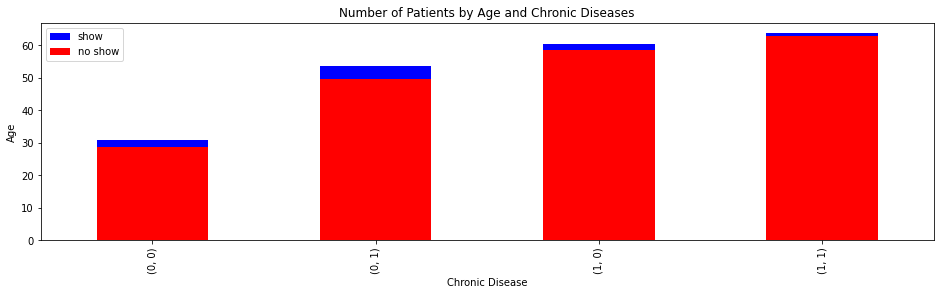

In [ ]:
# Does Age and Chronic Diseases affect on showing up to appointments?
plt.figure(figsize=(16,4))
df[show].groupby(["Hypertension","Diabetes"])["Age"].mean().plot(kind = "bar", color = "blue", label = "show")
df[no_show].groupby(["Hypertension","Diabetes"])["Age"].mean().plot(kind = "bar", color = "red", label = "no show")
plt.legend()
plt.title("Number of Patients by Age and Chronic Diseases")
plt.xlabel("Chronic Disease")
plt.ylabel("Age")
plt.show()

In [ ]:
df[show].groupby(["Hypertension","Diabetes"])["Age"].mean()

Hypertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [ ]:
df[no_show].groupby(["Hypertension","Diabetes"])["Age"].mean()


Hypertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

#### Conclusion
<ul>
<li>Mean Age of people that show and not having any chronic disease is 30 and most of people did not show</li>
<li>Mean Age of people that show and having diabetes is 53 and most of people did not show</li>
<li>Mean Age of people that show and having hypertension is 58 and most of people did not show</li>
<li>Mean Age of people that show and having hypertension and diabetes is 63 and most of people did not show</li>
<li>There is a direct relationship between the number of chronic diseases and mean Ages</li>
<li>But Age and Chronic Diseases did not affect in show and no show, because number of showing and no showing in each phase still the same</li>
</ul>

#### Q (2): What is the attendance rate of each Gender?

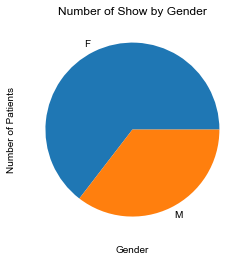

In [ ]:
def gender_attendance(df,col_name,attended,absent):
    plt.figure(figsize=(16,4))
    df[col_name][attended].value_counts(normalize=True).plot(kind = "pie", label = "show")
    plt.title("Number of Show by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of Patients")
    plt.style.use("seaborn")
    plt.show()

gender_attendance(df,"Gender",show,no_show)

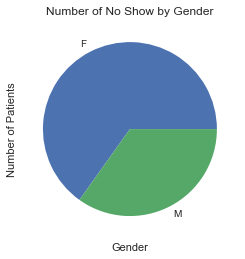

In [ ]:
def gender_attendance(df,col_name,attended,absent):
    plt.figure(figsize=(16,4))
    df[col_name][absent].value_counts(normalize=True).plot(kind = "pie", label = "show")
    plt.title("Number of No Show by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Number of Patients")
    plt.show()

gender_attendance(df,"Gender",show,no_show)

In [ ]:
df["Gender"][show].value_counts(normalize=True)

F    0.645578
M    0.354422
Name: Gender, dtype: float64

In [ ]:
df["Gender"][no_show].value_counts(normalize=True)

F    0.651418
M    0.348582
Name: Gender, dtype: float64

#### Conclusions
<ul>
<li>Famale has the heighest number of showing and no showing 65%</li>
<li>percentile of Males in show and no show is 35%</li>
<li>Gender has no effect on showing status</li>
</ul>

#### Q (3): Does Age and Gender affect on attendance rate together?

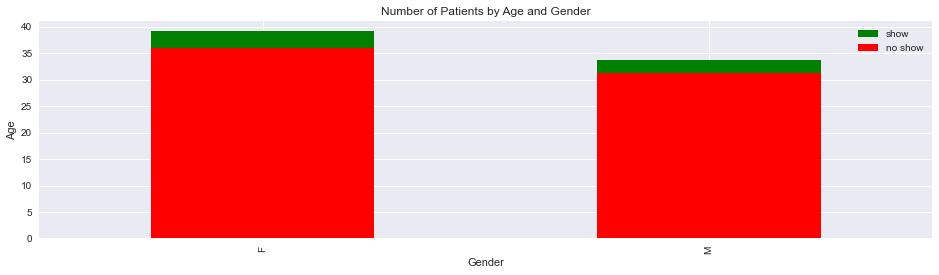

In [ ]:
# Does Age and Gender affect on attendance rate together?
plt.figure(figsize=(16,4))
df[show].groupby("Gender")["Age"].mean().plot(kind = "bar", label = "show", color = "green")
df[no_show].groupby("Gender")["Age"].mean().plot(kind = "bar", label = "no show", color = "red")
plt.legend()
plt.title("Number of Patients by Age and Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

In [ ]:
df[show].groupby("Gender")["Age"].mean()

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64

In [ ]:
df[no_show].groupby("Gender")["Age"].mean()


Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64

#### Conclusions
<ul>
<li>in show appointments the mean age of male is 33 and female is 39</li>
<li>in no show appointments the mean age of male is 31 and female is 36</li>
<li>There is no a big difference between show and no show so Age and Gender doesn't affect on show status</li>
</ul>

#### Q (4): Does Neighbourhood affect on show status or not?

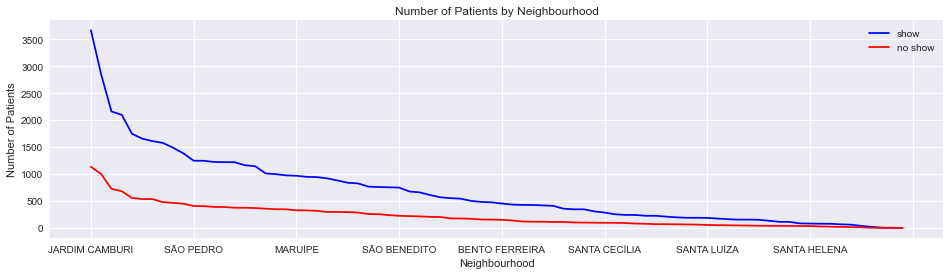

In [ ]:
# Does Neighbourhood affect on show status or not?
plt.figure(figsize=(16,4))
df[show]["Neighbourhood"].value_counts().plot(kind = "line", label = "show", color = "blue")
df[no_show]["Neighbourhood"].value_counts().plot(kind = "line", label = "no show", color = "red")
plt.legend()
plt.title("Number of Patients by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Patients")
plt.show()

#### Conclusions
<ul>
<li>"JARDM CAMBURI" is having the heighest number of patients in showing and no showing and the next is "MARIA ORTIZ"</li>
<li>The lowest number of patients in show and no show in "IHA DO BOI" and "PONTAL DE CAMBURI"</li>
<li>So Neighbourhood is playing a big role in showing and no showing</li>
</ul>

<a id='conclusions'></a>
## Conclusions

<ul>
<li>Most of patients they showed up is between 0 - 10, it means that most of people take care about their childrens</li>
<li>Most of patients in 60 years old and above did not showed up to their appointments</li>
<li>It means that Age have a big role in attendance</li>
<li>But Age and Chronic Diseases did not affect in show and no show, because number of showing and no showing in each phase still the same</li>
<li>Number of Patients of no show maybe the same whether received a SMS or not</li>
<li>I need to check my SMS campaigns</li>
<li>So Neighbourhood is playing a big role in showing and no showing</li>
</ul>